# Generation of Bell states and quantum entanglement
#

In [83]:
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
# Visualization
from qiskit.visualization import array_to_latex, plot_histogram
# Simulator
from qiskit_aer import Aer
# Others 
from IPython.display import Markdown
import numpy as np

## <font color=Magenta> Create Bell state $|\phi^+\rangle$</font>

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


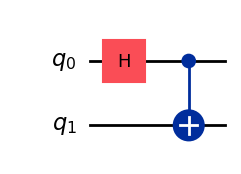

Two qubit state =

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [84]:
qc = QuantumCircuit(2)

# Apply H-gate to the first qubit:
qc.h(0)
# Apply a CNOT:
qc.cx(0,1)


phi_p = Statevector(qc)
print(phi_p)
display(qc.draw('mpl'))
display(Markdown(r'Two qubit state ='),phi_p.draw('latex'))
array_to_latex(phi_p, prefix="(\\text{Two qubit state})^T = ")

## <font color=Magenta> $\bullet$ Simulate and plot probabilties for $|\phi^+\rangle$</font>

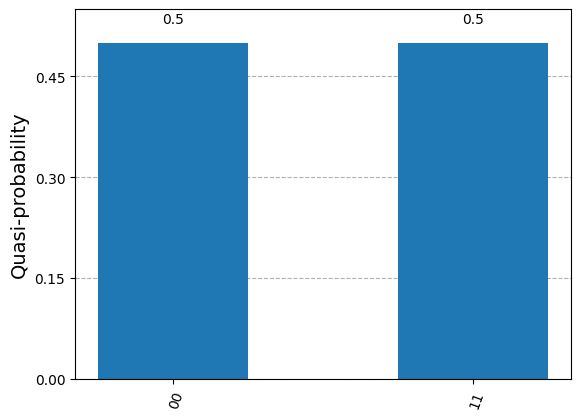

In [85]:
simulator = AerSimulator()

# Save the statevector into the quantum circuit
qc.save_statevector()


# Transpile the circuit for the simulator
qc = transpile(qc, simulator)

#result = simulator.run(qobj).result() # obsolete
result = simulator.run(qc).result()


# Print the statevector neatly:
final_state = result.get_statevector()
plot_histogram(result.get_counts())

## <font color=Magenta> Create Bell state $|\psi^+\rangle$</font>


Statevector([0.        +0.j, 0.70710678+0.j, 0.70710678+0.j,
             0.        +0.j],
            dims=(2, 2))


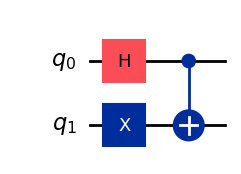

Two qubit state =

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [86]:
qc = QuantumCircuit(2)

# Create state |1> on q1 channel
qc.x(1)

# Apply H-gate to the first:
qc.h(0)
# Apply a CNOT:
qc.cx(0,1)
qc.draw('mpl')

psi_p = Statevector(qc)
print(psi_p)
display(qc.draw('mpl'))
display(Markdown(r'Two qubit state ='),psi_p.draw('latex'))
array_to_latex(psi_p, prefix="(\\text{Two qubit state})^T = ")

## <font color=Magenta> $\bullet$ Simulate and plot probabilties for $|\psi^+\rangle$</font>


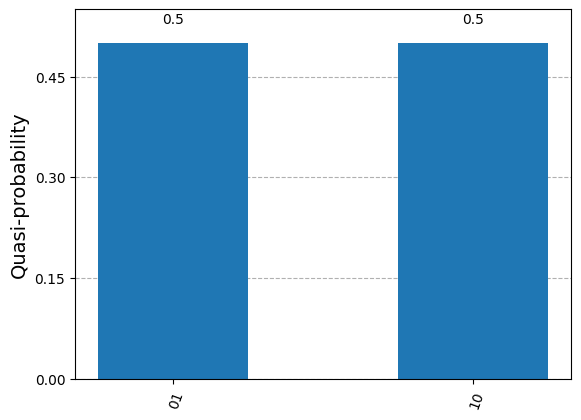

In [87]:
simulator = AerSimulator()

# Save the statevector into the quantum circuit
qc.save_statevector()


# Transpile the circuit for the simulator
qc = transpile(qc, simulator)

#result = simulator.run(qobj).result() # obsolete
result = simulator.run(qc).result()


# Print the statevector neatly:
final_state = result.get_statevector()
plot_histogram(result.get_counts())

Remark: Only state |01> and |10> are contributing with equal probabilities: 50%

### <font color=Magenta>Exercise: \n Create $|\phi^-\rangle$ and $|\psi^-\rangle$?</font>
#### Hint:  state $|1\rangle$ gives minus sign after operating with H-gate. 